In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
prices_path = os.path.join(os.getcwd(), 'Dataset', 'NYSE_Dataset', 'prices-split-adjusted.csv')
prices_df = pd.read_csv(prices_path)

In [67]:
prices_df.head(n=1)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.43,125.839996,122.309998,126.25,2163600.0


In [18]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


## Data Cleaning and Wrangling

In [70]:
prices_df['date'] = pd.to_datetime(prices_df['date'])

In [19]:
prices_df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [20]:
# prices_df['date'] = pd.to_datetime(prices_df['date'])

In [21]:
# Check for duplicates
prices_df.duplicated().sum()

0

In [22]:
# Check for missing values
prices_df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

### EDA

In [29]:
prices_df['symbol']

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [36]:
# For simplicity, we will focus on 2 stocks: AAPL and NVDA

# Filter for AAPL and NVDA
aapl_nvda_df = prices_df[(prices_df['symbol'] == 'AAPL') | (prices_df['symbol'] == 'NVDA')]
aapl_nvda_df.head()

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
566,2010-01-04,NVDA,18.510000,18.490000,18.110001,18.620001,20005100.0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
1034,2010-01-05,NVDA,18.420000,18.760000,18.420000,18.959999,18216200.0
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0


In [37]:
aapl_nvda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3524 entries, 254 to 851100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3524 non-null   object 
 1   symbol  3524 non-null   object 
 2   open    3524 non-null   float64
 3   close   3524 non-null   float64
 4   low     3524 non-null   float64
 5   high    3524 non-null   float64
 6   volume  3524 non-null   float64
dtypes: float64(5), object(2)
memory usage: 220.2+ KB


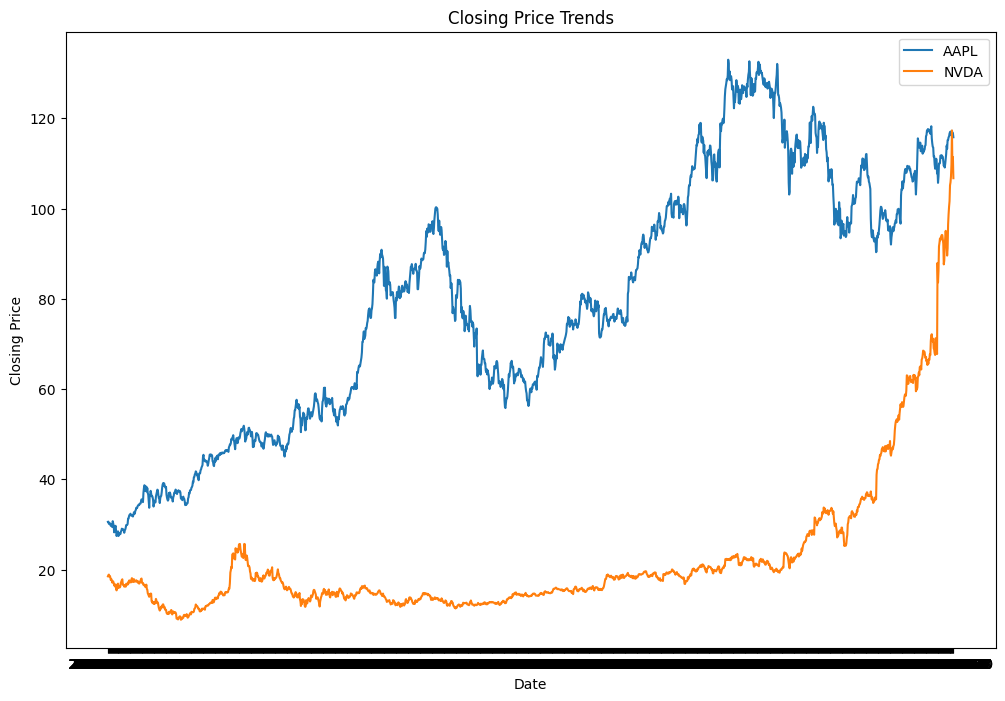

In [38]:
# Plotting closing price trends for the selected stocks

plt.figure(figsize=(12, 8))
for ticker in aapl_nvda_df['symbol'].unique():
    subset_df = aapl_nvda_df[aapl_nvda_df['symbol'] == ticker]
    plt.plot(subset_df['date'], subset_df['close'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Trends')
plt.legend()
plt.show()

In [39]:
# Summary statistics for the 'close' prices and 'volume'
summary_stats_close = aapl_nvda_df['close'].describe()
summary_stats_volume = aapl_nvda_df['volume'].describe()

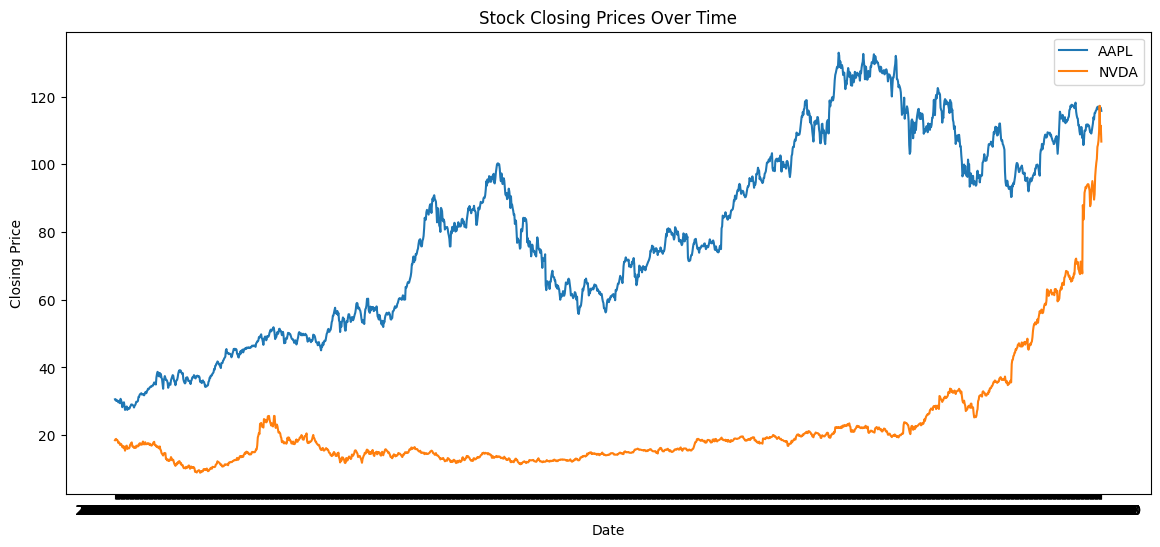

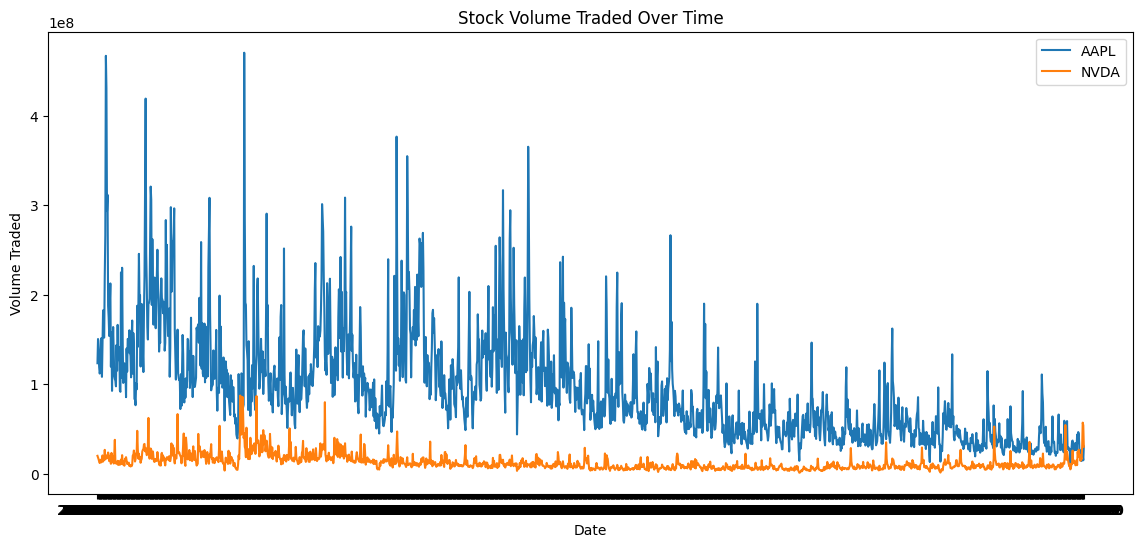

In [40]:
# Plotting closing price trends for the sample companies
plt.figure(figsize=(14, 6))
for ticker in aapl_nvda_df['symbol'].unique():
    subset = aapl_nvda_df[aapl_nvda_df['symbol'] == ticker]
    plt.plot(subset['date'], subset['close'], label=ticker)
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plotting volume traded for the sample companies
plt.figure(figsize=(14, 6))
for ticker in aapl_nvda_df['symbol'].unique():
    subset = aapl_nvda_df[aapl_nvda_df['symbol'] == ticker]
    plt.plot(subset['date'], subset['volume'], label=ticker)
plt.title('Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.legend()
plt.show()

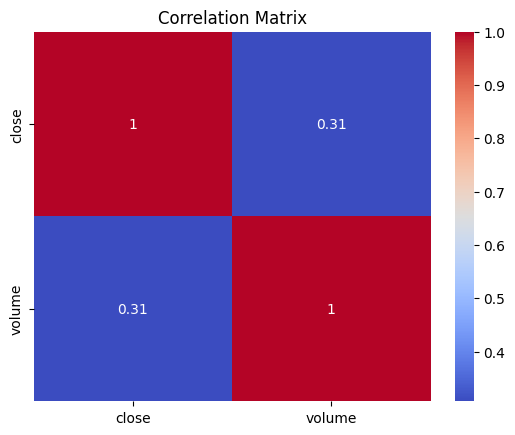

In [45]:
# Correlation matrix of closing prices and volume
correlation_matrix = aapl_nvda_df[['close', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [47]:
# For simplicity, we'll use the closing price as the feature to predict the next closing price
# We'll create a new column 'previous_close' that shifts the 'close' column by 1 day
aapl_nvda_df['previous_close'] = aapl_nvda_df.groupby('symbol')['close'].shift(1)

In [49]:
# Drop the rows with missing values
aapl_nvda_df.dropna(inplace=True)

In [50]:
# Separate into features and target
X = aapl_nvda_df['previous_close'].values.reshape(-1, 1)
y = aapl_nvda_df['close'].values.reshape(-1, 1)

In [51]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
# Linear regression model

linear = LinearRegression()
linear.fit(X_train, y_train)

# Predictions
y_pred = linear.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 1.353523743171479


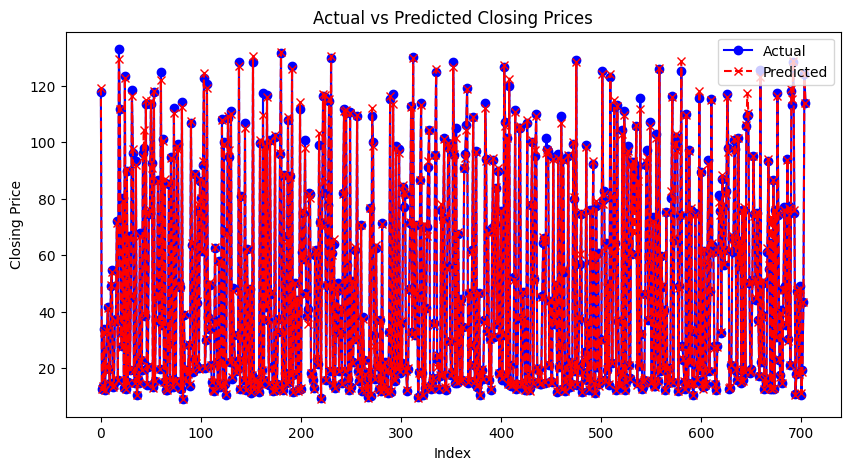

In [58]:
# Create an index array, same length as y_test
index_array = np.arange(len(y_test))

# Assuming y_test and y_pred are numpy arrays and have the same length
plt.figure(figsize=(10, 5))

# Plot the actual closing prices
plt.plot(index_array, y_test, label='Actual', color='blue', marker='o')

# Plot the predicted closing prices
plt.plot(index_array, y_pred, label='Predicted', color='red', linestyle='--', marker='x')

# Label the plot
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


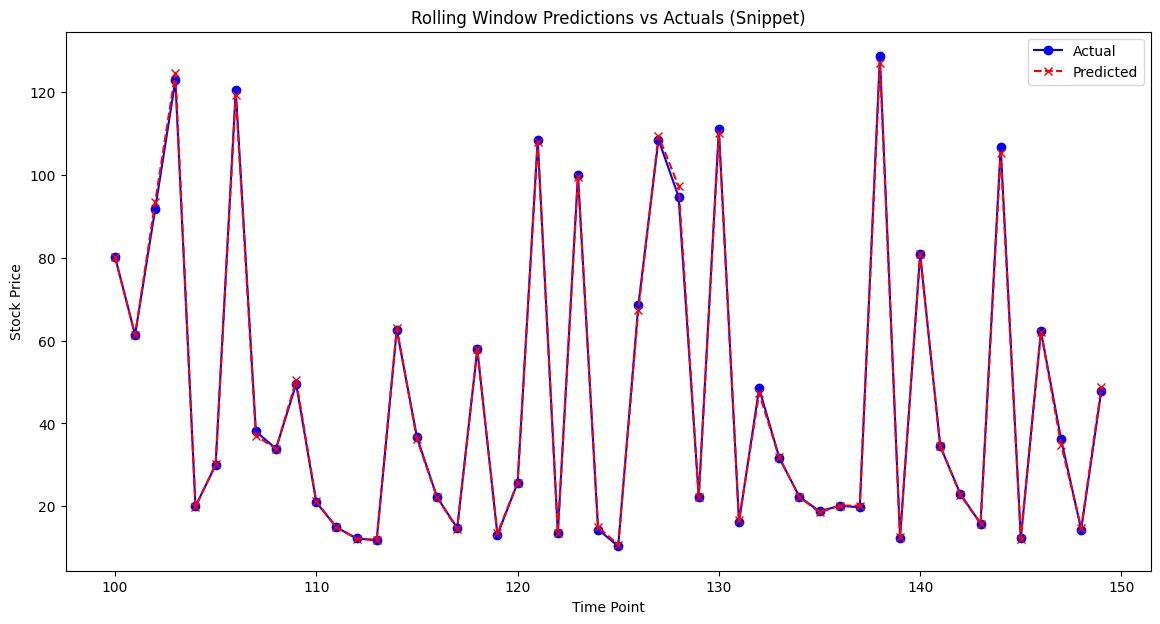

In [91]:
start_index = 100  
end_index = 150    
plt.figure(figsize=(14, 7))

plt.plot(range(start_index, end_index), y_test[start_index:end_index], label='Actual', color='blue', marker='o')

# Plot the rolling predictions for the snippet
plt.plot(range(start_index, end_index), y_pred[start_index:end_index], label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Rolling Window Predictions vs Actuals (Snippet)')
plt.xlabel('Time Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [59]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = linear.score(X_test, y_test)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9986650939018912


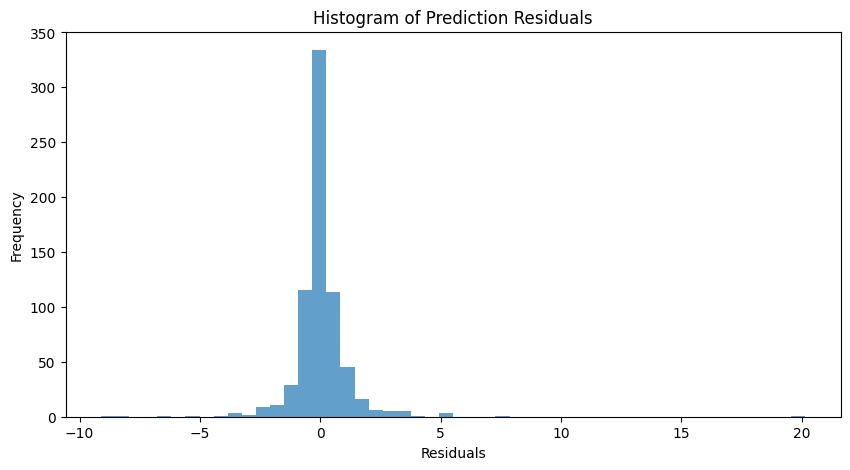

In [60]:
residuals = y_test - y_pred

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Histogram of Prediction Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [61]:
# Calculate the error metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error: {}'.format(mae))
print('Mean Squared Error: {}'.format(mse))
print('Root Mean Squared Error: {}'.format(rmse))

Mean Absolute Error: 0.6510308135840568
Mean Squared Error: 1.832026523328932
Root Mean Squared Error: 1.353523743171479


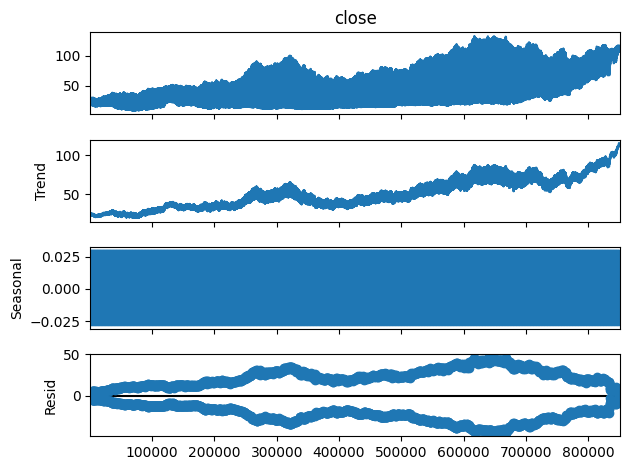

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonal and residual components
residuals = residuals[:259].reshape(-1, )

index = pd.date_range(start='2016-01-05', end='2016-12-30', freq='B')
residual_series = pd.Series(residuals, index=index)

decomposition = seasonal_decompose(aapl_nvda_df['close'], model='additive', period=5)
decomposition.plot()
plt.show()


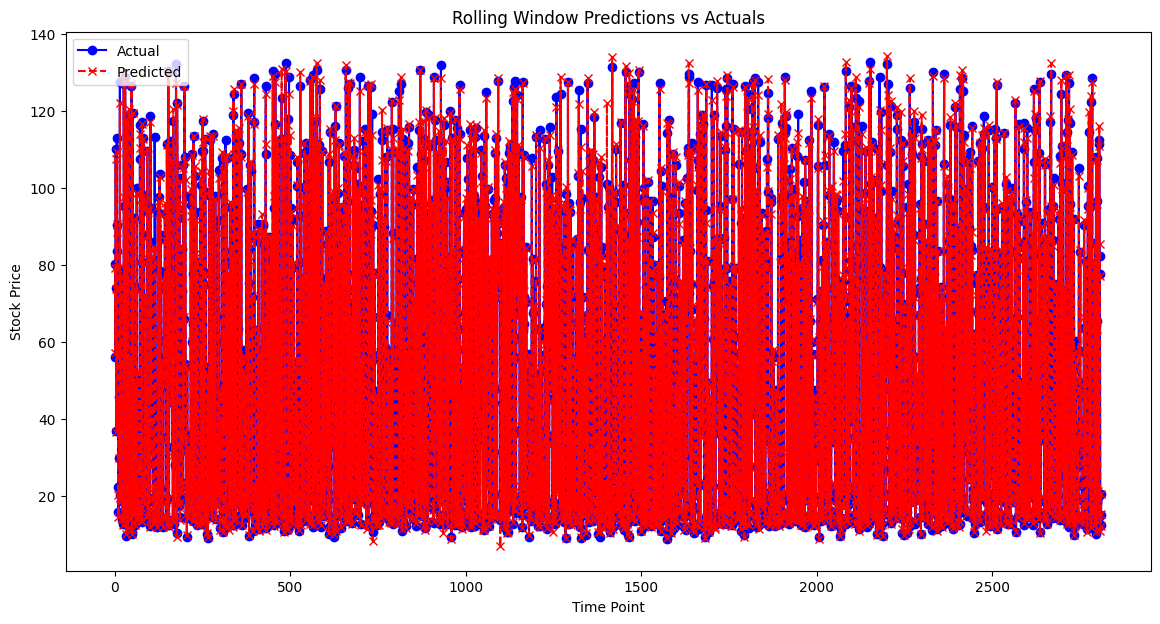

In [88]:
window_size = 5  

rolling_predictions = []
rolling_actuals = []

for end in range(window_size, len(X_train)):
    start = end - window_size
    
    train_subset = X_train[start:end]
    y_subset = y_train[start:end]
    
    model = LinearRegression().fit(train_subset, y_subset)
    
    actual = y_train[end:end+1][0]
    pred = model.predict(X_train[end:end+1])[0]
    
    rolling_predictions.append(pred)
    rolling_actuals.append(actual)


plt.figure(figsize=(14, 7))
plt.plot(rolling_actuals, label='Actual', color='blue', marker='o')
plt.plot(rolling_predictions, label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Rolling Window Predictions vs Actuals')
plt.xlabel('Time Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the RMSE
rolling_rmse = np.sqrt(mean_squared_error(rolling_actuals, rolling_predictions))
print(f"Rolling Window RMSE: {rolling_rmse}")

Rolling Window RMSE: 1.5905584847883711


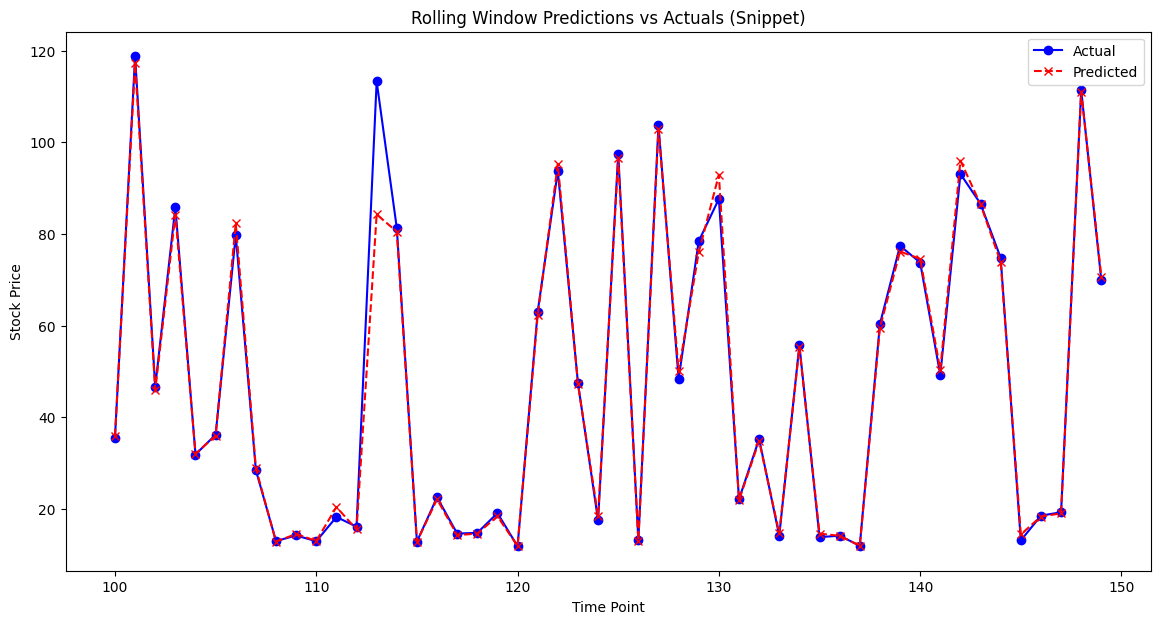

In [90]:
start_index = 100  
end_index = 150    

plt.figure(figsize=(14, 7))
plt.plot(range(start_index, end_index), rolling_actuals[start_index:end_index], label='Actual', color='blue', marker='o')

plt.plot(range(start_index, end_index), rolling_predictions[start_index:end_index], label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Rolling Window Predictions vs Actuals (Snippet)')
plt.xlabel('Time Point')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
